## MULTIPLE LINEAR REGRESSION 

In typical problems, the prediction or predicted value is generally depends on more than one variable. For example, consider the following problem Data Scientists at an online retailer like Amazon, Alibaba or Flipkart have to deal with. They want to decide the demand of an item such as women's tops for a particular month. Solving this problem has many benefits - it allows them to know how many guests to expect in the website during the time (they can switch off the extra servers to save money and energy while ensuring that the website experience for guests is good for them), how much inventory to keep in their warehouse (optimize the storage cost) and ensure there are enough resources to get them delivered to shoppers in right time. Thus, they may want to build a prediction model that gives them a close estimate of what demand to expect in coming months using logs from previous months. Some of the obvious factors which might have an impact on sale of one item in the website are - time of year (summer/ rains/ winter), customer reviews (ratings), option of free delivery, style of clothing, color, sale (Diwali, thanksgiving or Independence Day sale), price, brand, clothing material and so on. Such models are built to predict demand but can also infer other information such as the sweet spot (discount) that maximizes the profits or study the influence of clothing material on sales. Or to introduce a new designer brand in limited numbers, the regression can be used to determine the price which will ensure all units are sold out exactly.

Let us consider another example. The weather department wants to build a model to predict the temperature for the next day based on some observations on weather (locally) over the past few days. This may be useful for a number of purposes of general public. Some of the feature that they may use as input to the model are as follows - temperature, humidity, atmospheric pressure, dewpoint, levels of pollutants, movement of vehicles and precipitation. One may need to have separate values for minimum, maximum and average value of above features over a day. Having these values for nearby towns will be additionally helpful to improve the model.

Like the above examples, having more than one input variable is pretty common in machine learning problems. Based on the foundation of simple linear regression we discussed in last chapter, we discuss a more complex case with multiple input variables here. The equations are all simple and straight forward. However, we strongly encourage the readers 
Linear regression with multiple variables is also known as "multivariate linear regression. A linear model for the prediction of $y$ from the predictors (or observations) $x_1$,$x_2$...$x_n$ has the following form -

\begin{equation}
y = \beta_0 + \beta_1* x_1 + \beta_2* x_2 +.......... +\beta_n *x_n + \epsilon \tag{*}
\end{equation}

The parameters $\beta_0, \beta_1,.........,\beta_k$ are called regression coefficients.$\epsilon$ is random variation in $y$ due to other variables (not by $x$) but are not known or observed.

The above model is linear in $\beta$ parameters, but it is not necessarily linear in the x variables. The following model is also considered in multiple linear regression models:
$$y = \beta_0 + \beta_1* x_1 + \beta_2* x_2^2 + \beta_3*\cos {x_2} +\epsilon \tag{*}$$
We can also represent multi-variable regression moddel in the matrix form as  follows:

\begin{align*}y =\begin{bmatrix}\beta_0 \hspace{2em} \beta_1 \hspace{2em} ... \hspace{2em} \beta_n\end{bmatrix}\begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}= \beta^T x\end{align*}

By the defination of matrix multplication $\beta$ and $x$ match elementwise with each other and both have $(m+1)$ elements.

Let us consider an example of multiple linear regression with a synthetic dataset. The ad revenue dataset has two inputs - hour of day and duration of ad while the output variable is the revenue generated by the advertisement. 

## Gradient Descent for Multiple Variables
This is an extension of the gradient descent for single variable. Mathematically we can represent the algorithm as follows:

\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \beta_j := \beta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\beta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} \; & \text{for j := 0...n}\newline \rbrace\end{align*}

## Data Preprocessing

Generally we can observe differnt features of a model have different range of values. In that case $\beta$ will descend faster in features having smaller ranges and slowly in the large ranges.As a result, we will find non uniform oscilations to the optimum (or minimum). Here, Idea is to have all the features roughly in the same rander or interval. For example-

$−1 ≤ x_{(i)} ≤ 1$

There are two approaches to it-

1. Feature Scaling- dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable, resulting in a new smaller range. 

2. Mean Normalization- Performing the following operation on each input value


$$ x{\rm '}=\frac { x-avg (x)} {max(x)-min(x)}$$

The differenceis in feature scaling and mean normalization is that, in scaling,  the range of data changes while in normalization the shape of the distribution of data changes.

## Learning Rate


## Code and example



In [2]:
# import some python packages
from statistics import mean
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd



Let us load the dataset.

In [3]:
# loading forestfire dataset from current folder into dataframe df0
# Pandas has a built-in function to read csv files and read them as Pandas dataframe. 
df0=pd.read_csv("ad_revenue.csv") 
# The head function is used to sneak into the top few columns of a dataframe.
df0.head()

,hour,duration,revenue
0,4,30,41100
1,5,10,16200
2,7,50,62900
3,11,50,63900
4,16,20,31900


Let us select the input and predicted variables from the dataframe and normalize them. It is a good practise to normalize the data and it aids in training.

In [4]:
# assigning column named 'area' from dataset to variable Y (This is the value to be predicted)
Y_revenue=df0['revenue']

# data normalization/ preprocessing to ensure that the prediction Y varies from 0 to 1
Y_rev_min=Y_revenue.min()
Y_rev_max=Y_revenue.max()
Y=(Y_revenue-Y_rev_min)/(Y_rev_max-Y_rev_min) 

# remove the column revenue from input variables. 
X=df0.drop(['revenue'], axis=1) 
data=X
X=((data-data.min())/(data.max()-data.min()))

#adding the bias term as additional input to X
X['bias']=1 

#converting data into array
X=np.array(X) 
y=Y.reshape(X.shape[0],1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Let us define a function for linear regression using multiple variables. This is a simple extension of the code we wrote for regression from single variable. 

In [5]:
# this function computes the value of regression coffecients (the array b contains beta0 and beta1 values)
def linear_regression(X, y, epochs=100, learning_rate=.001): 
    # N is the number of samples we are training on
    N = float(len(y))
    # Initialize b to the same size as number of input variables we are predicting on. 
    b=np.zeros((X.shape[1],1))
    # We additionally initialize an array that stores the output b values after each epoch
    b_List=np.zeros((epochs,X.shape[1])) 
    
    # The for loop ensures that the code runs for all epochs
    for i in range(epochs):
        #obtain predicted value for current values of b. For first epoch, b has all zeros so y_current=0
        y_current = np.matmul(X,b)
        
        #use a cost function to compute the cost
        cost = sum([data**2 for data in (y-y_current)]) / N
        #compute the gradient for each beta coefficient
        b_gradient = -(2/N) * sum(X * (y - y_current))  
        b_gradient=np.reshape(b_gradient, (X.shape[1],1))
        # update the beta values using gradient descent
        b = b*(1-learning_rate/N) - (learning_rate * b_gradient)   
        b_List[i]=b.transpose()
    return b, b_List

In [6]:
# Let us obtain the optimal b1 coefficients and predicted values.
b1,b1_list=linear_regression(X,y,2000,0.11)
Y_pred = np.matmul(X,b1) # Value of output (y) predicted by model
print("The regression coefficients [beta2,beta1,beta0] are: ",b1.T)

#We need to scale the predicted values of Y back to compare them against original Y_revenue values
Y_revenue_pred= (Y_rev_max-Y_rev_min)*Y_pred + Y_rev_min

print("Sample Predictions in integers:")
print(np.round((Y_revenue_pred[1:5]).T,0))

#The variable Y_revenue is not an array but a Pandas series. We force it to a 2D array of length (N,1)
Y_revenue_2d=(np.array(Y_revenue)[np.newaxis]).T
print("Actual values of Y:")
print(Y_revenue_2d[1:5].T)


The regression coefficients [beta2,beta1,beta0] are:  [[ 0.14274482  0.7681631   0.05420636]]
Sample Predictions in integers:
[[ 17706.  58048.  59580.  31813.]]
Actual values of Y:
[[16200 62900 63900 31900]]


## Metrics

The goodness of fit of a model can be evaluated using many metrics. Next, we will evaluate the RMSE or root mean square error and R2 coefficient of fit for the predicted revenue versus actual revenues. A higher R2 and lower RMSE indicate a better fit and are useful metrics to decide relative performance of the model. 

The exact metrics used in evaluation would also depend on the problem also. Some metrics are more suitable for one case while others may be suited for another. 

In [7]:
# Model Evaluation - root mean square error
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

RMSE_normalized=rmse(y,Y_pred)
RMSE=rmse(Y_revenue_2d,Y_revenue_pred)

print("The root mean square error for the above regression model are",RMSE_normalized,  "for normalized output and",RMSE," for given output y values.")

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_total = sum((Y - mean_y) ** 2)
    ss_residual = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

R2_normalized=r2_score(y,Y_pred)
R2=r2_score(Y_revenue_2d,Y_revenue_pred)

print("The R-square error for the above regression model are",R2_normalized,  "for normalized output and",R2," for given output y values.")

print("Although the error depends on the mean of Y values, the R2 score is actually independent of the mean of output values and thus explains the nature of fit.")


The root mean square error for the above regression model are [ 0.04251683] for normalized output and [ 2738.08363341]  for given output y values.
The R-square error for the above regression model are [ 0.97800407] for normalized output and [ 0.97800407]  for given output y values.
Although the error depends on the mean of Y values, the R2 score is actually independent of the mean of output values and thus explains the nature of fit.


## Visualize the cost function

Next, we try to plot the cost function as a variable of beta values. We will observe that the behavior of cost function with respect to each variable is parabolic (there is a unique minimum value) and that in 2D, the overall curve is like a valley. (Hence the name gradient descent is justified, one can say). 

Please note that the code implementation in this chapter has X[2,:] as the bias term but it corresponds to beta0 values in the mathematical formulation. We consider beta0=0 to draw this plot. (b1,b2) refers to (beta1,beta2) variables (corresponding to X[0,:] and X[1,:]).

In [12]:
# this function is used to plot cost as a variable of parameters (beta0,beta1)
# Inputs: the input features X, the predicted value y, a list each for the various values of b0 and b1, we should compute cost
# The numpy has a useful function called as arange which takes three arguments - first value, last value and step size to generate a list or sequence satisfying these conditions.

def linear_regression_parameter_plot(X, y, b2_List =np.arange(-5, 5, 0.5),b1_List =np.arange(-5, 5, 0.05)):

    # Step 1: define a range of b0 and b1 (beta0 and beta1) parameters, convert it into a 2D grid\
    b2_GRID, b1_GRID = np.meshgrid(b2_List, b1_List) 
    
    # Step 2: compute the cost function for all combinations of b0 and b1 on this gird.
    N = float(len(y))
    n = len(b2_List)
    m = len(b1_List)
    COST_GRID= np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            y_current = (b1_GRID[i][j] * X.transpose()[1]) + b2_GRID[i][j]*X.transpose()[0]
            y_current= y_current.reshape(y_current.shape[0],1)
            cost = sum([data**2 for data in (y-y_current)]) / N
            COST_GRID[i][j]=cost
    return b2_GRID,b1_GRID,COST_GRID

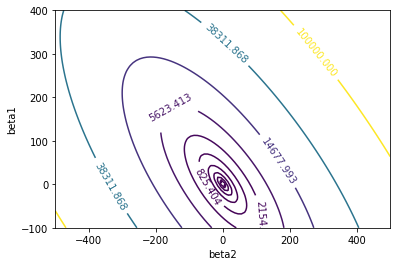

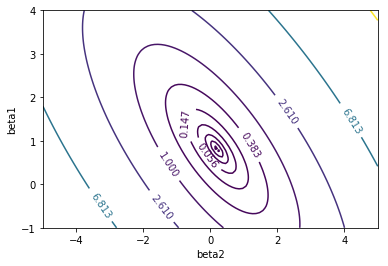

In [13]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour

#generating the values of b0 and b1 in certain interval
b2_List =linspace(-500, 500, 100)
b1_List =linspace(-100, 400, 100)
b2,b1,cost= linear_regression_parameter_plot(X,y,b2_List,b1_List)  

#contour plot of J(b0,b1)
cp = plt.contour(b2, b1, cost, logspace(-5, 5, 25))
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('beta2')
plt.ylabel('beta1')

plt.show()

#generating the values of b0 and b1 in certain interval
b2_List =linspace(-5, 5, 100)
b1_List =linspace(-1, 4, 100)
b2,b1,cost= linear_regression_parameter_plot(X,y,b2_List,b1_List)  

#contour plot of J(b0,b1)
cp = plt.contour(b2, b1, cost, logspace(-5, 5, 25))
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('beta2')
plt.ylabel('beta1')

plt.show()

The first figure are contour plots and elliptical orbit shows the region of equal cost. Thus, we can see that there is a valley around origin. When we zoom at the figure (by running the same command on a smaller range of beta values), we can see that beta2 is minimum around small positive value near zero while beta1 is minimum around small positive value near 1. This result corroborates with the obtain beta1 and beta2 values in gradient descent (since beta0 is close to 0). If beta0 was a large value, say 100, then these numbers would not match.

## Preliminary Data Visualization & Seaborn

At this point, we would like to introduce another library for python developers which is pretty helpful in visualizing directly from dataframes. As we saw earlier, we can use matplotlib library to plot data from arrays format. While matplotlib allows us to generate nice visualizations, seaborn tries to make a well-defined set of hard tasks very convenient. 

One of the great advantage of this library is that required (column) labels from DataFrames are automatically propagated to plots or other data structures, saving a lot of time.

We will be using a function called as pairplot which helps us to plot one column values against another. 


In [14]:
import seaborn as sns

#Add predicted value to the original dataframe
df0['revenue_pred']= Y_revenue_pred

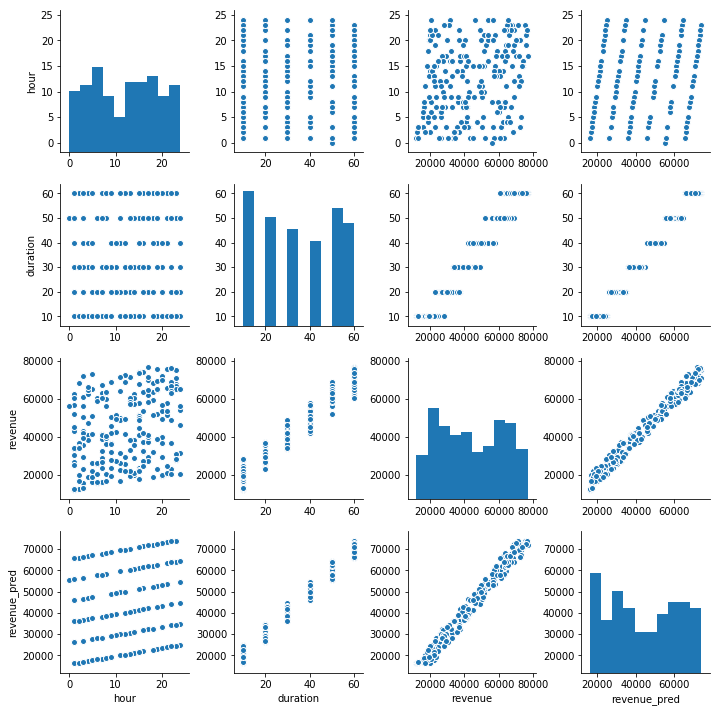

In [15]:
sns.pairplot(df0)
plt.show()

The pairplot function plots the distribution of one variable with respect to another. The diagonal columns of this figure matrix actually plots the histogram of the variable. We can make the following observations:
1. The hour varies from 0 to 23. The observations are actually not uniform for each hour and we have fewer observations for 10-11 am.
2. The duration varies from 10 to 60. 
3. Hour-Duration plot doesn't show any meaningul trend. 
4. Revenue-Hour plot doesn't show any meaningful trend while Revenue-Duration trend definitely shows a linear trend. Increasing duration of ad leads to increased revenue. 
5. Since revenue_pred is a variable predicted from the given inputs, its plot with hour and duration shows a linear trend. Revenue_pred-Duration plot shows a linear trend similar to Revenue-Duration plot while Revenue_pred-Hour plot tries to approximate the Revenue-Hour plot to piece-wise linear trends (six straight lines, which may well correspond to six durations)
6. The plot between Revenue-Revenue_pred shows a strong linear relationship, indicating that the model very closely correlates to actual revenue. 

It is actually possible to make each of these plot using matplotlib, but that would be tiring process. Let us, for example, plot the Revenue-Revenue_pred graph. 

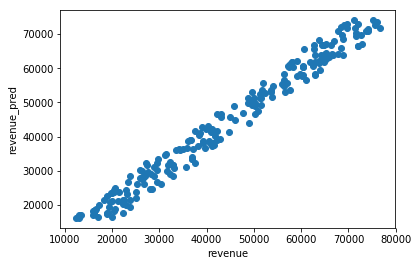

In [25]:
df1=df0.loc[:, "revenue": "revenue_pred"]
#sort the values according to actual revenue (to see the linear relationships clearly)
df2=df1.sort_values('revenue')
#Obtain the two columns as numpy array
labels_preds=np.array(df2)
# Extract each value into a separate variable
xx=labels_preds[:,0]
yy=labels_preds[:,1]
plt.plot(xx,yy,'o')

# Add label to the axis
column_names=df2.columns
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.show()

It is sometimes interesting to plot both Revenue and Revenue_pred in same figure, to get a visual feel of how much off our predictions are. Last, we will try to generate such a plot.

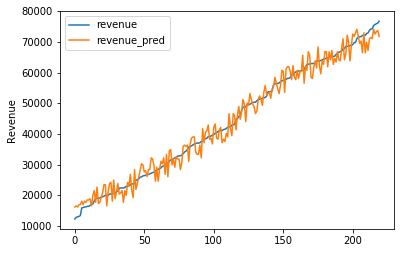

In [30]:
# Plot y and y_pred values and name the lines as such.
plt.plot(xx,label=column_names[0])
plt.plot(yy,label=column_names[1])
# Force it to display the legend in upper left corner.
plt.legend(loc="upper left")
plt.ylabel("Revenue")
plt.show()